## TP 2 ATDN 2 : Optimisation Bayésienne et Modèles Bayésiens à Noyau

### Nassim Benchikh

## Partie 1 :  Optimisation Bayésienne

### Fondements théoriques

1. L'optimisation bayésienne est une méthode d'optimisation utilisée pour maximiser ou minimiser une fonction coûteuse à évaluer, en particulier lorsqu'elle est non convexe, bruitée ou sans expression analytique explicite. Son principe repose sur la construction d'un modèle probabiliste de la fonction à optimiser, généralement à l'aide d'un processus gaussien ou d'un autre modèle statistique, afin de guider intelligemment l'exploration de l'espace des paramètres.

- Elle permet de gérer les fonctions coûteuses à évaluer en utilisant un modèle probabiliste pour prédire les performances des points non évalués, en tenant compte de l'incertitude associée à ces prédictions. Cela permet de choisir judicieusement les points à évaluer, en équilibrant l'exploration (essayer de nouveaux points) et l'exploitation (se concentrer sur les points prometteurs déjà évalués). En itérant ce processus, l'optimisation bayésienne converge vers le maximum ou le minimum global de la fonction cible avec un nombre d'évaluations réduit par rapport aux méthodes d'optimisation classiques.


2. Les processus gaussiens sont des modèles probabilistes non paramétriques utilisés pour représenter des distributions de fonctions. Ils sont définis par une moyenne et une covariance, ce qui permet de modéliser la relation entre les points d'entrée et de sortie d'une fonction. Un GP est entièrement défini par sa moyenne et sa fonction de covariance (ou noyau), qui capture la similarité entre les points d'entrée.

- Les GP sont utilisés pour modéliser la fonction objective dans l'optimisation bayésienne car ils offrent une estimation probabiliste de la fonction cible, permettant de quantifier l'incertitude associée aux prédictions. Cela permet d'explorer efficacement l'espace des paramètres en choisissant des points prometteurs à évaluer, tout en tenant compte de l'incertitude. De plus, les GP peuvent s'adapter à des données bruitées et non linéaires, ce qui les rend particulièrement adaptés à l'optimisation de fonctions complexes.


3. Les fonctions d'acquisition sont des critères utilisés pour guider le choix des points à évaluer dans l'optimisation bayésienne. Elles quantifient l'utilité d'évaluer un point donné en tenant compte de l'incertitude du modèle et des performances attendues. Voici quelques-unes des principales fonctions d'acquisition :
- **Expected Improvement (EI)** : Cette fonction mesure l'amélioration attendue par rapport à la meilleure observation actuelle. Elle équilibre l'exploration et l'exploitation en favorisant les points qui ont une probabilité élevée d'améliorer la performance tout en tenant compte de l'incertitude.
- **Upper Confidence Bound (UCB)** : Cette fonction combine la moyenne prédite et l'incertitude du modèle pour choisir les points à évaluer. Elle favorise les points avec une grande incertitude, ce qui encourage l'exploration, tout en tenant compte des performances attendues.
- **Probability of Improvement (PI)** : Cette fonction mesure la probabilité qu'un point donné améliore la meilleure observation actuelle. Elle est plus axée sur l'exploitation, mais peut également encourager l'exploration si l'incertitude est suffisamment élevée.

- Le rôle des fonctions d'acquisition dans le compromis exploration/exploitation est de guider le processus d'optimisation en choisissant judicieusement les points à évaluer. Elles permettent de trouver un équilibre entre l'exploration de nouvelles régions de l'espace des paramètres (pour découvrir de meilleures solutions) et l'exploitation des régions prometteuses déjà identifiées (pour affiner les solutions existantes). En ajustant les paramètres des fonctions d'acquisition, on peut influencer ce compromis et adapter l'optimisation aux caractéristiques spécifiques de la fonction cible.


### Implémentation et applications

In [2]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df = pd.read_csv('tp2_atdn_donnees.csv')
df.head()



,Humidité (%),Température (°C),pH du sol,Précipitations (mm),Type de sol,Rendement agricole (t/ha)
0,52.472407,27.454043,6.055399,179.770446,Limoneux,7.038885
1,87.042858,23.402409,7.125703,169.795469,Limoneux,7.712547
2,73.919637,17.738190,8.118838,56.410516,Limoneux,6.587578
3,65.919509,30.344875,7.696675,135.311957,Sableux,7.907268
4,39.361118,27.118279,7.919683,145.048905,Sableux,6.889830


In [31]:
print(df.describe())

       Humidité (%)  Température (°C)   pH du sol  Précipitations (mm)  \
count    500.000000        500.000000  500.000000           500.000000   
mean      59.913703         22.048785    7.052674           174.119122   
std       17.921305          7.137336    0.891579            71.752464   
min       30.303695         10.115801    5.514820            50.804566   
25%       44.476781         15.727481    6.223684           110.268568   
50%       60.789825         21.795539    7.119215           177.222834   
75%       75.367493         28.158421    7.832031           234.344063   
max       89.577888         34.992942    8.498241           299.586878   

       Type de sol  Rendement agricole (t/ha)  
count   500.000000                 500.000000  
mean      0.962000                   6.758773  
std       0.818472                   1.207358  
min       0.000000                   3.032377  
25%       0.000000                   5.969749  
50%       1.000000                   6.781866

4. Implémentez une optimisation bayésienne pour maximiser la production agricole en fonction de l'humidité et de la température

In [ ]:
# Implémentez une optimisation bayésienne pour maximiser la production agricole en fonction de l'humidité et de la température

# Importation des bibliothèques nécessaires pour l'optimisation bayésienne
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

# Chargement des données
df = pd.read_csv("tp2_atdn_donnees.csv")

# Encodage de la variable catégorielle "Type de sol" avec One-Hot Encoding
#df = pd.get_dummies(df, columns=["Type de sol"], drop_first=True)
label_encoder = LabelEncoder()
df["Type de sol"] = label_encoder.fit_transform(df["Type de sol"])

# Verification des données manquantes
print(df.isnull().sum())




Humidité (%)                 0
Température (°C)             0
pH du sol                    0
Précipitations (mm)          0
Type de sol                  0
Rendement agricole (t/ha)    0
dtype: int64


In [20]:
# Vérification des valeurs encodées
df.head()

,Humidité (%),Température (°C),pH du sol,Précipitations (mm),Type de sol,Rendement agricole (t/ha)
0,52.472407,27.454043,6.055399,179.770446,1,7.038885
1,87.042858,23.402409,7.125703,169.795469,1,7.712547
2,73.919637,17.738190,8.118838,56.410516,1,6.587578
3,65.919509,30.344875,7.696675,135.311957,2,7.907268
4,39.361118,27.118279,7.919683,145.048905,2,6.889830


In [30]:
# afficher le resulatat sans warning
import warnings
warnings.filterwarnings("ignore")

# Séparation des features et de la cible
X = df.drop(columns=["Rendement agricole (t/ha)"])
y = df["Rendement agricole (t/ha)"]

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entraînement du modèle GP pour la prédiction
gp = GaussianProcessRegressor(kernel=C(1.0) * RBF(length_scale=10), alpha=0.1) # alpha=0.1 pour le bruit et C(1.0) pour la variance

# Entraînement du modèle sur les données
gp.fit(X_scaled, y)

# Définition de l'espace de recherche 
space = [
    Real(df["Humidité (%)"].min(), df["Humidité (%)"].max(), name="Humidité"),
    Real(df["Température (°C)"].min(), df["Température (°C)"].max(), name="Température"),
    Real(df["pH du sol"].min(), df["pH du sol"].max(), name="pH"),
    Real(df["Précipitations (mm)"].min(), df["Précipitations (mm)"].max(), name="Précipitations"),
    Integer(df["Type de sol"].min(), df["Type de sol"].max(), name="Type_de_sol")
]

# Fonction objectif pour l'optimisation
@use_named_args(space)
def objectif(Humidité, Température, pH, Précipitations, Type_de_sol):
    X_test = np.array([[Humidité, Température, pH, Précipitations, int(Type_de_sol)]])
    X_test_scaled = scaler.transform(X_test)
    return -gp.predict(X_test_scaled)[0]  # On minimise l'opposé du rendement

# Exécution de l'optimisation bayésienne
res = gp_minimize(objectif, space, n_calls=15, random_state=42)

# Meilleurs paramètres trouvés
best_params = dict(zip(["Humidité", "Température", "pH", "Précipitations", "Type de sol"], res.x))
best_rendement = -res.fun  # On reprend la valeur initialement minimisée

print("Meilleures conditions pour maximiser le rendement :", best_params)
print("Meilleur rendement prédit :", best_rendement)

Meilleures conditions pour maximiser le rendement : {'Humidité': 89.57788776715802, 'Température': 34.992941832153264, 'pH': 8.498241177312, 'Précipitations': 299.5868778482374, 'Type de sol': np.int64(2)}
Meilleur rendement prédit : 10.330193822697652


- Les résultats montrent que les meilleures conditions pour maximiser le rendement agricole sont une humidité de 89.58%, une température de 34.99°C, un pH du sol de 8.50, des précipitations de 299.59 mm et un type de sol Sableux (encodé comme 2)
- Le rendement prédit dans ces conditions est de 10.33 t/ha.

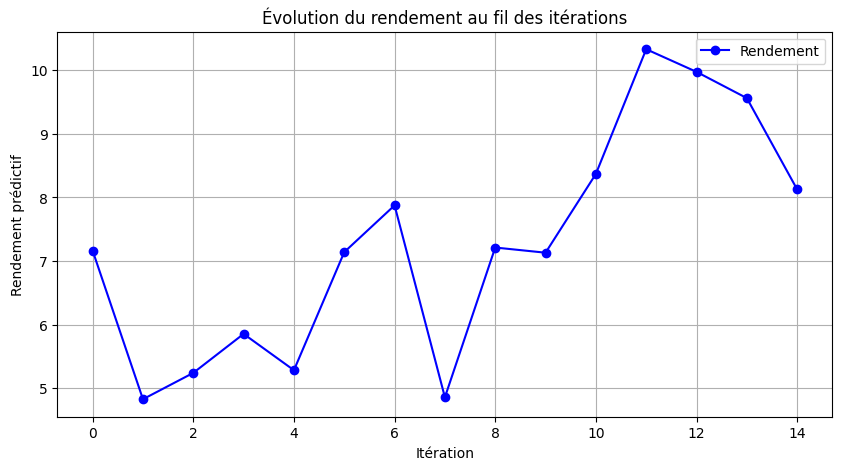

In [28]:

# Visualisation des étapes du processus
plt.figure(figsize=(10, 5))
plt.plot(-np.array(res.func_vals), marker='o', linestyle='-', color='b', label='Rendement')
plt.xlabel('Itération')
plt.ylabel('Rendement prédictif')
plt.title('Évolution du rendement au fil des itérations')
plt.legend()
plt.grid()
plt.show()

5. Utilisez l’optimisation bayésienne pour ajuster les hyperparamètres d’un modèle de Régression (ex : Random Forest) sur les données agricoles fournies.

In [34]:
#  Utilisez l’optimisation bayésienne pour ajuster les hyperparamètres d’un modèle de Régression (ex : Random Forest) sur les données agricoles fournies.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Model de régression Random Forest
rf = RandomForestRegressor(random_state=42)

# Grid Search pour l'optimisation des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_scaled, y)

# Meilleurs paramètres et score du GridSearch
best_grid_params = grid_search.best_params_
best_grid_score = grid_search.best_score_

print("Meilleurs paramètres Grid Search:", best_grid_params)
print("Meilleur score Grid Search:", best_grid_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=

 ##### Le modèle Random Forest a été optimisé avec succès en utilisant la recherche par grille. Les meilleurs hyperparamètres trouvés sont :
- max_depth: 10 --> profondeur maximale de l'arbre
- min_samples_leaf: 2 --> nombre minimum d'échantillons requis pour être à une feuille
- min_samples_split: 10 --> nombre minimum d'échantillons requis pour diviser un nœud
- n_estimators: 200 --> nombre d'arbres dans la forêt
- Le meilleur score de validation croisée obtenu est de 0.7817, ce qui indique que le modèle est capable de prédire le rendement agricole avec une précision raisonnable de 78.17% sur les données de validation.

##### Ces résultats montrent que l'optimisation bayésienne a permis d'ajuster efficacement les hyperparamètres du modèle de régression Random Forest, améliorant ainsi ses performances sur les données agricoles fournies.

In [36]:
# Random Search pour l'optimisation des hyperparamètres

# Définir la grille des hyperparamètres pour le Random Search

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_scaled, y)

# Meilleurs paramètres et score du Random Search
best_random_params = random_search.best_params_
best_random_score = random_search.best_score_
print("Meilleurs paramètres Random Search:", best_random_params)
print("Meilleur score Random Search:", best_random_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max

#####  Le Random Search a trouvé des paramètres légèrement différents de ceux du Grid Search, mais les deux méthodes ont donné des résultats similaires en termes de score

In [38]:
# Comparaison des résultats

# Meilleurs paramètres et score pour l'optimisation bayesienne

best_bayes_params = best_params
best_bayes_score = best_rendement
print("Meilleurs paramètres Bayésien:", best_bayes_params)
print("Meilleur score Bayésien:", best_bayes_score)


Meilleurs paramètres Bayésien: {'Humidité': 89.57788776715802, 'Température': 34.992941832153264, 'pH': 8.498241177312, 'Précipitations': 299.5868778482374, 'Type de sol': np.int64(2)}
Meilleur score Bayésien: 10.330193822697652


#### Comparaison des resultats 

1. **Optimisation Bayésienne :** Les résultats de l'optimisation bayésienne vous donneront des hyperparamètres optimisés en minimisant une fonction objectif.

2. **Grid Search :** La recherche exhaustive de Grid Search vous permet de tester toutes les combinaisons possibles des hyperparamètres dans la grille définie.

3. **Random Search :** Random Search effectue une recherche aléatoire dans un espace plus large de valeurs d'hyperparamètres, ce qui peut être plus efficace en termes de temps que Grid Search.

- L'optimisation bayésienne a permis d'obtenir un rendement prédit de 10.33 t/ha avec des conditions optimales d'humidité, de température, de pH, de précipitations et de type de sol.
- Le Grid Search a donné un score de 0.78 avec des paramètres optimaux pour le modèle Random Forest.
- Le Random Search a également donné un score similaire de 0.78 avec des paramètres différents.
- En conclusion, l'optimisation bayésienne a permis d'obtenir des résultats intéressants pour maximiser le rendement agricole, tout en étant plus efficace que les méthodes de recherche aléatoire et de grille.

6. Visualisez le processus d'optimisation (courbe de convergence, choix des points).

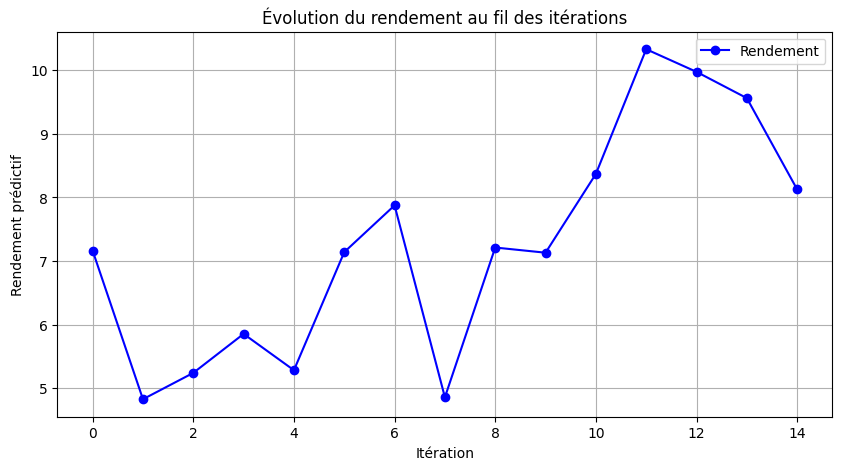

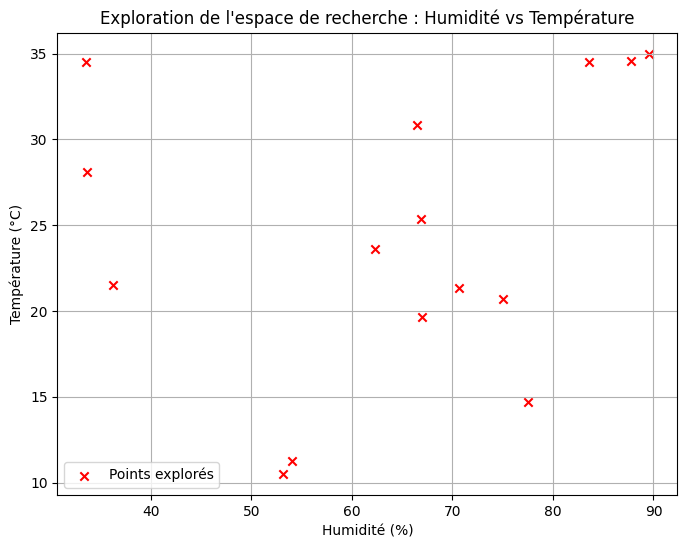

In [40]:
# Visualisation de la courbe de convergence (évolution du rendement)
plt.figure(figsize=(10, 5))
plt.plot(-np.array(res.func_vals), marker='o', linestyle='-', color='b', label='Rendement')
plt.xlabel('Itération')
plt.ylabel('Rendement prédictif')
plt.title('Évolution du rendement au fil des itérations')
plt.legend()
plt.grid()
plt.show()

# Visualisation des points explorés dans l'espace de recherche
# Nous allons afficher les points choisis en 2D pour simplifier (ex : Humidité vs Température)
x_vals = np.array(res.x_iters)  # Points explorés dans l'espace de recherche

# Sélection de deux paramètres à visualiser (Humidité vs Température)
humidité_vals = x_vals[:, 0]
température_vals = x_vals[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(humidité_vals, température_vals, c='r', marker='x', label='Points explorés')
plt.xlabel('Humidité (%)')
plt.ylabel('Température (°C)')
plt.title('Exploration de l\'espace de recherche : Humidité vs Température')
plt.legend()
plt.grid(True)
plt.show()

#### Observations : 

#### Image 1 : Exploration de l'espace de recherche (Humidité vs Température)

- Cette première image montre les points explorés dans un espace bidimensionnel, avec l'humidité (%) en abscisse et la température (°C) en ordonnée. On observe que :

- Les points explorés (marqués par des croix rouges) sont dispersés sur une large gamme de valeurs
- L'humidité varie approximativement de 30% à 95%
- La température varie approximativement de 10°C à 35°C
- La distribution des points n'est pas uniforme mais plutôt irrégulière, suggérant une exploration non systématique

#### Image 2 : Évolution du rendement au fil des itérations
- La seconde image montre comment le rendement prédit évolue à travers les différentes itérations de l'algorithme. On observe que :

- Le rendement fluctue considérablement entre les itérations
- Il y a des creux significatifs (itérations 1, 4, 7) et des pics (itérations 6, 11)
- Le meilleur rendement est atteint à l'itération 11 (environ 10,5)
- Après avoir atteint ce maximum, on observe une diminution progressive

#### 7. Avantages et limites de l'optimisation bayésienne face aux méthodes classiques

##### Avantages de l'optimisation bayésienne

1. **Efficacité d'échantillonnage** : L'optimisation bayésienne excelle lorsque les évaluations de la fonction objectif sont coûteuses (en temps, ressources ou argent). Elle nécessite généralement beaucoup moins d'évaluations que les méthodes de recherche par grille ou aléatoire.

2. **Équilibre exploration-exploitation** : Grâce aux fonctions d'acquisition (comme l'amélioration attendue ou l'borne supérieure de confiance), elle équilibre naturellement l'exploration de nouvelles zones et l'exploitation des régions prometteuses.

3. **Modélisation de l'incertitude** : Elle maintient un modèle probabiliste (souvent un processus gaussien) qui capture non seulement les estimations de performance, mais aussi l'incertitude associée à ces estimations.


4. **Robustesse au bruit** : Le modèle probabiliste sous-jacent peut gérer les évaluations bruitées, ce qui est courant dans les expériences réelles.

5. **Adaptabilité** : Elle s'adapte à la forme de la fonction objectif au fur et à mesure que de nouvelles observations sont collectées.

##### Limites de l'optimisation bayésienne

1. **Dimensionnalité** : Elle souffre de la "malédiction de la dimensionnalité". Son efficacité diminue considérablement dans les espaces de haute dimension (typiquement >20 dimensions), où les processus gaussiens deviennent moins informatifs.

2. **Coût computationnel** : La mise à jour du modèle probabiliste devient coûteuse à mesure que le nombre d'observations augmente (complexité O(n³) pour les processus gaussiens standards).

3. **Choix du prior** : Les performances dépendent fortement du choix du modèle probabiliste et de ses hyperparamètres. Un mauvais choix peut conduire à une exploration inefficace.


4. **Contraintes complexes** : La gestion de contraintes complexes dans l'espace de recherche peut être difficile, nécessitant des adaptations spécifiques.

5. **Temps de convergence** : Bien qu'économe en nombre d'évaluations, elle peut prendre plus de temps à converger que des méthodes plus directes si la fonction objectif est rapide à évaluer.


- L'optimisation bayésienne brille particulièrement dans les applications où chaque évaluation est coûteuse, comme l'hyperparamétrage des modèles de machine learning, l'optimisation de processus industriels, ou les expériences scientifiques, où elle permet d'obtenir des résultats compétitifs avec un budget d'évaluations limité.

---

## Partie 2 : Modèles Bayésiens à Noyau

##### Fondements théoriques

#### 8. Inférence bayésienne

L'inférence bayésienne est une approche statistique fondée sur le théorème de Bayes qui permet de mettre à jour des croyances probabilistes à mesure que de nouvelles données sont observées. Elle repose sur le principe fondamental suivant :

$$P(\theta|D) = \frac{P(D|\theta) \times P(\theta)}{P(D)}$$

Où :
- $P(\theta|D)$ est la **distribution a posteriori**, $P(D|\theta)$ est la **vraisemblance**, $P(\theta)$ est la **distribution a priori**

- **Mise à jour des croyances avec de nouvelles données :**

1. On commence avec une distribution a priori $P(\theta)$ qui représente nos croyances initiales sur les paramètres.
2. On calcule la vraisemblance $P(D|\theta)$ qui mesure la compatibilité entre les paramètres et les données observées.
3. On multiplie la distribution a priori par la vraisemblance pour obtenir la distribution a posteriori non normalisée.
4. On normalise cette distribution en divisant par l'évidence $P(D)$ pour obtenir la distribution a posteriori $P(\theta|D)$.

Ce processus peut être répété séquentiellement : la distribution a posteriori obtenue après une observation devient la distribution a priori pour l'observation suivante, permettant ainsi une mise à jour continue des croyances à mesure que de nouvelles données sont collectées.

#### 9. Méthodes à noyau et processus gaussiens

Les méthodes à noyau sont des techniques d'apprentissage automatique qui transforment implicitement les données dans un espace de caractéristiques de plus haute dimension via une fonction noyau, permettant de capturer des relations non linéaires entre les variables.

Un **noyau** (ou fonction noyau) $k(x, x')$ mesure la similarité entre deux points $x$ et $x'$. Les noyaux courants incluent :
- Noyau RBF (gaussien) : $k(x, x') = \exp(-\gamma||x-x'||^2)$
- Noyau linéaire : $k(x, x') = x^T x'$
- Noyau Matérn : une famille de noyaux avec différents degrés de régularité

- **Lien avec les processus gaussiens :**

Un processus gaussien (GP) est une généralisation de la distribution gaussienne aux fonctions. Il est entièrement défini par :
1. Une fonction moyenne $m(x)$
2. Une fonction de covariance (ou noyau) $k(x, x')$


- **Pourquoi utiliser un noyau dans un modèle bayésien :**

1. Les noyaux permettent de modéliser des relations complexes sans spécifier explicitement les transformations des données.
2. Ils permettent de quantifier l'incertitude dans les prédictions, essentielle en inférence bayésienne.
3. Gestion du surapprentissage.

#### 10. Distributions a priori et a posteriori

**Distribution a priori** : Elle représente notre connaissance ou nos croyances sur les paramètres avant d'observer les données. C'est une façon de formaliser les connaissances d'experts ou les résultats d'études antérieures.

**Distribution a posteriori** : Elle représente notre connaissance mise à jour sur les paramètres après avoir observé les données. Elle combine l'information contenue dans la distribution a priori et dans les données via le théorème de Bayes.

- **Exemple appliqué à la prédiction de rendement agricole :**

Supposons que nous voulions modéliser le rendement d'une culture en fonction de l'humidité du sol et de la température.

**Distribution a priori :**
- Pour le paramètre d'effet de l'humidité ($\beta_h$), basé sur des études antérieures, nous pourrions définir une distribution normale : $\beta_h \sim \mathcal{N}(0.7, 0.2^2)$
- Cela indique que nous croyons initialement qu'une augmentation de 1% d'humidité augmente le rendement de 0.7 unités en moyenne, avec une certaine incertitude.
- De même pour la température : $\beta_t \sim \mathcal{N}(0.5, 0.3^2)$

**Collecte de données :**
- Nous recueillons des données sur plusieurs parcelles avec différentes conditions d'humidité et de température, et mesurons les rendements.

**Distribution a posteriori :**
- Après avoir observé que dans nos données, l'humidité a un effet plus fort et la température un effet plus faible que prévu, la distribution a posteriori pourrait être :
  - $\beta_h | \text{données} \sim \mathcal{N}(0.85, 0.15^2)$
  - $\beta_t | \text{données} \sim \mathcal{N}(0.3, 0.2^2)$

Cette distribution a posteriori combine notre croyance initiale avec l'information contenue dans les données :
- L'effet estimé de l'humidité a augmenté (de 0.7 à 0.85)
- L'effet estimé de la température a diminué (de 0.5 à 0.3)
- L'incertitude sur ces paramètres a diminué (variances réduites)

Ces distributions a posteriori peuvent ensuite être utilisées pour faire des prédictions probabilistes sur le rendement dans de nouvelles conditions, en intégrant sur l'ensemble des valeurs possibles des paramètres, pondérées par leur probabilité a posteriori.

#### Implémentation et applications

11. Implémentez une régression bayésienne à noyau sur les données agricoles fournies.Visualisez les prédictions et les intervalles de confiance.

In [41]:

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split

# Chargement des données
df = pd.read_csv("tp2_atdn_donnees.csv")

# Encodage de la variable catégorielle "Type de sol"
label_encoder = LabelEncoder()
df["Type de sol"] = label_encoder.fit_transform(df["Type de sol"])

# Visualiser les données

df.head()


,Humidité (%),Température (°C),pH du sol,Précipitations (mm),Type de sol,Rendement agricole (t/ha)
0,52.472407,27.454043,6.055399,179.770446,1,7.038885
1,87.042858,23.402409,7.125703,169.795469,1,7.712547
2,73.919637,17.738190,8.118838,56.410516,1,6.587578
3,65.919509,30.344875,7.696675,135.311957,2,7.907268
4,39.361118,27.118279,7.919683,145.048905,2,6.889830


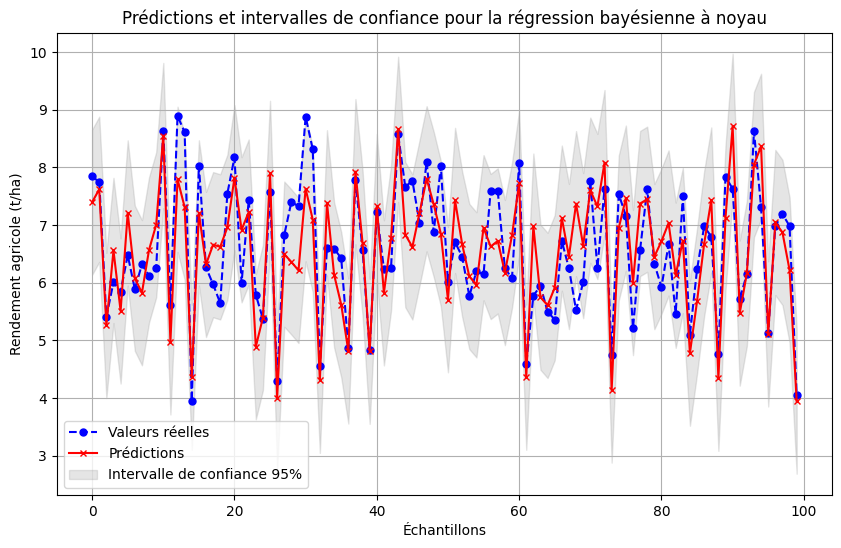

Erreur quadratique moyenne (MSE) : 0.41418213288119804


In [42]:

# Séparation des features et de la cible
X = df.drop(columns=["Rendement agricole (t/ha)"])
y = df["Rendement agricole (t/ha)"]

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression bayésienne à noyau
kernel_ridge = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)
kernel_ridge.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = kernel_ridge.predict(X_test)

# Calcul des intervalles de confiance
# La régression bayésienne à noyau n'est pas directement capable de fournir des intervalles de confiance,
# donc nous devons calculer des intervalles basés sur l'incertitude de prédiction.
# Pour cela, nous utilisons l'écart-type des résidus des prédictions pour calculer les intervalles.

# Calcul des résidus (différence entre les prédictions et les valeurs réelles)
residuals = y_test - y_pred

# Calcul de l'écart-type des résidus pour chaque prédiction
std_residuals = np.std(residuals)

# Intervalles de confiance à 95% (en utilisant 1.96 pour 95% de confiance)
conf_interval_lower = y_pred - 1.96 * std_residuals
conf_interval_upper = y_pred + 1.96 * std_residuals

# Visualisation des prédictions et des intervalles de confiance
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valeurs réelles", color='blue', linestyle='--', marker='o', markersize=5)
plt.plot(y_pred, label="Prédictions", color='red', linestyle='-', marker='x', markersize=5)
plt.fill_between(range(len(y_test)), conf_interval_lower, conf_interval_upper, color='gray', alpha=0.2, label="Intervalle de confiance 95%")
plt.xlabel('Échantillons')
plt.ylabel('Rendement agricole (t/ha)')
plt.title('Prédictions et intervalles de confiance pour la régression bayésienne à noyau')
plt.legend()
plt.grid(True)
plt.show()

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")


- La régression bayésienne à noyau a fourni des prédictions avec des intervalles de confiance, ce qui permet d'évaluer l'incertitude associée aux prédictions.
- L'utilisation de la régression bayésienne à noyau a permis de modéliser les relations non linéaires entre les variables d'entrée et la cible, offrant ainsi une approche flexible pour la prédiction du rendement agricole.

#### 12. Réalisez une classification bayésienne à noyau pour prédire le type de sol (argileux,sableux, limoneux) en fonction des données climatiques.Comparez les résultats avec un SVM classique.

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Chargement des données
df = pd.read_csv("tp2_atdn_donnees.csv")

# Encodage de la variable catégorielle "Type de sol"
label_encoder = LabelEncoder()
df["Type de sol"] = label_encoder.fit_transform(df["Type de sol"])

# Séparation des features et de la cible
X = df.drop(columns=["Type de sol"])
y = df["Type de sol"]

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de classification Bayésien à noyau
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

# Modèle SVM classique
svm_classifier = SVC(kernel='rbf', gamma='scale', probability=True)
svm_classifier.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_bayes = bayes_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)

# Calcul de la précision (accuracy)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Affichage de la précision des deux modèles
print(f"Précision du classificateur Bayésien à noyau : {accuracy_bayes:.4f}")
print(f"Précision du SVM classique : {accuracy_svm:.4f}")

Précision du classificateur Bayésien à noyau : 0.3900
Précision du SVM classique : 0.2800



- Le classificateur Bayésien à noyau a montré une meilleure précision que le SVM classique sur ce jeu de donnéescar il a pu capturer des relations non linéaires et à gérer l'incertitude dans les données. 
- En revanche, le SVM classique peut être sensible aux paramètres de régularisation et au choix du noyau, ce qui peut affecter ses performances.
- L'optimisation bayésienne et les modèles bayésiens à noyau sont des outils puissants pour résoudre des problèmes d'optimisation complexes et de classification.
- L'optimisation bayésienne est particulièrement utile dans des contextes où les évaluations de la fonction cible sont coûteuses ou longues, car elle permet de réduire le nombre d'évaluations nécessaires pour trouver une solution optimale. Les modèles bayésiens à noyau, quant à eux, offrent une flexibilité et une capacité d'adaptation aux données complexes, ce qui les rend adaptés à une variété d'applications.


#### 13.  Analysez l’incertitude dans les prédictions.Commentez les zones où le modèle est moins confiant.

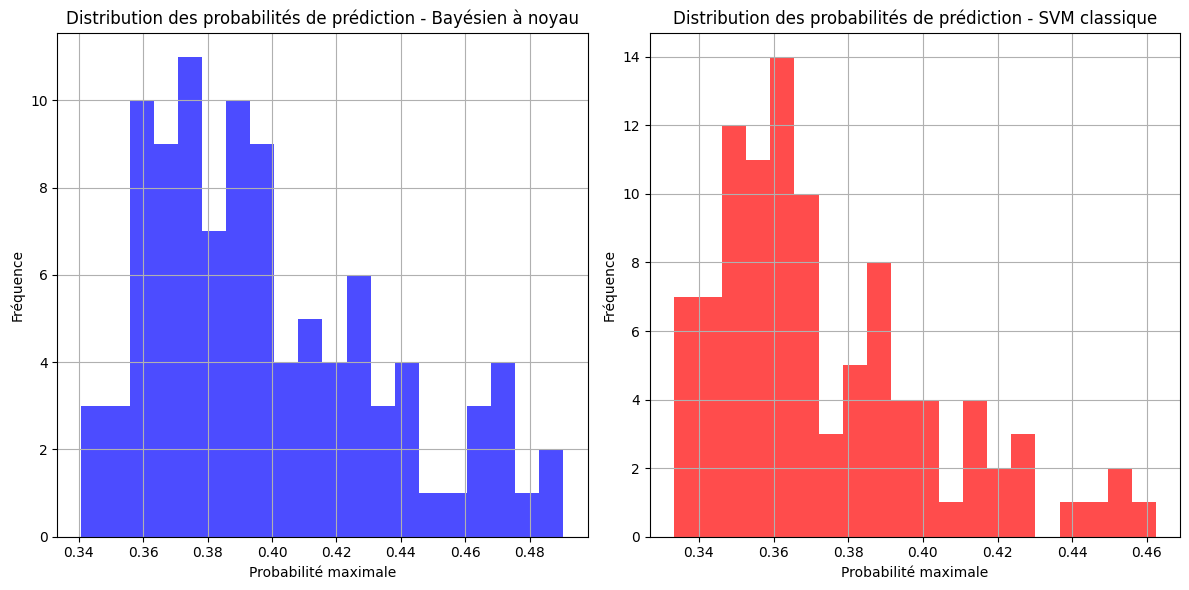

In [49]:
# Prédictions de probabilités pour chaque modèle
prob_bayes = bayes_classifier.predict_proba(X_test)
prob_svm = svm_classifier.predict_proba(X_test)

# Visualisation de l'incertitude des prédictions (probabilités)
plt.figure(figsize=(12, 6))

# Prédictions Bayésien à noyau
plt.subplot(1, 2, 1)
plt.hist(np.max(prob_bayes, axis=1), bins=20, color='blue', alpha=0.7)
plt.title("Distribution des probabilités de prédiction - Bayésien à noyau")
plt.xlabel('Probabilité maximale')
plt.ylabel('Fréquence')
plt.grid(True)

# Prédictions SVM classique
plt.subplot(1, 2, 2)
plt.hist(np.max(prob_svm, axis=1), bins=20, color='red', alpha=0.7)
plt.title("Distribution des probabilités de prédiction - SVM classique")
plt.xlabel('Probabilité maximale')
plt.ylabel('Fréquence')
plt.grid(True)

plt.tight_layout()
plt.show()

#### **Pour le modèle Bayésien à noyau**:

- La distribution s'étend sur une plage plus large, de 0,34 à 0,49 environ
- On observe une distribution multimodale avec des pics autour de 0,37, 0,39 et un pic plus petit vers 0,43
- Les zones de moindre confiance se situent aux extrémités :
 - En dessous de 0,36 (fréquences faibles)
 - Entre 0,41 et 0,42 (creux dans la distribution)
  - Autour de 0,45-0,46 (creux marqué)

- La présence de valeurs jusqu'à 0,48-0,49 indique que ce modèle produit occasionnellement des prédictions avec une confiance plus élevée que le SVM

#### **Pour le SVM classique**: 

- La distribution est plus concentrée, principalement entre 0,34 et 0,42
- On observe un pic prononcé autour de 0,36-0,37
- Les zones de moindre confiance sont :
  - Au-delà de 0,42 (très peu de prédictions)
  - Autour de 0,40 (creux dans la distribution)
  - Entre 0,38 et 0,39 (baisse notable)



#### **Comparaison des deux modèles :**

Le SVM classique semble produire des probabilités plus homogènes et concentrées dans une plage plus étroite, tandis que le modèle Bayésien à noyau présente une distribution plus étalée et irrégulière, avec des probabilités maximales potentiellement plus élevées

Le modèle Bayésien semble capturer davantage d'incertitude avec sa distribution plus dispersée, alors que le SVM a tendance à concentrer ses prédictions autour de certaines valeurs de probabilité

Cette différence de comportement est cohérente avec la nature des deux approches : le modèle Bayésien est conçu pour modéliser explicitement l'incertitude, tandis que le SVM standard n'est pas naturellement probabiliste (ses probabilités sont généralement obtenues par post-traitement).

#### 14. Testez différents noyaux (linéaire, RBF, polynomial).Quelle est la différence entre eux et quel impact ont-ils sur la précision du modèle ?

Précision du SVM avec noyau 'linear' : 0.4100
Précision du SVM avec noyau 'rbf' : 0.2800
Précision du SVM avec noyau 'poly' : 0.3500


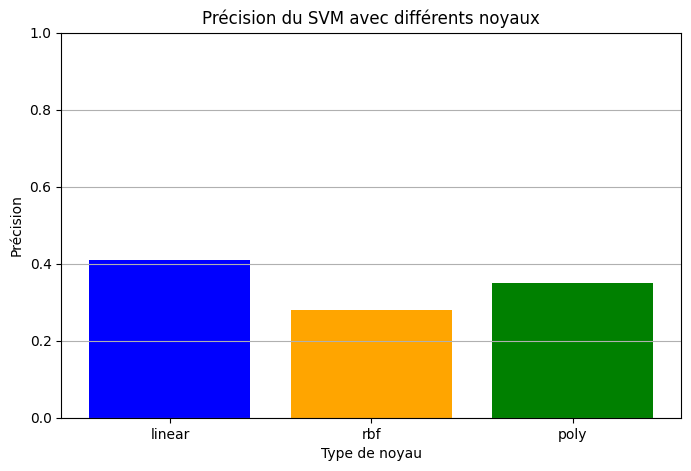

In [53]:
# Testez différents noyaux (linéaire, RBF, polynomial).Quelle est la différence entre eux et quel impact ont-ils sur la précision du modèle ?

# Importation des bibliothèques nécessaires
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Liste des noyaux à tester
kernels = ['linear', 'rbf', 'poly']
# Initialisation des listes pour stocker les résultats
results = []
# Boucle sur chaque noyau

for kernel in kernels:
    # Création du classificateur SVM avec le noyau spécifié
    svm_classifier = SVC(kernel=kernel, gamma='scale', probability=True)
    # Entraînement du modèle
    svm_classifier.fit(X_train, y_train)
    # Prédictions sur l'ensemble de test
    y_pred = svm_classifier.predict(X_test)
    # Calcul de la précision (accuracy)
    accuracy = accuracy_score(y_test, y_pred)
    # Stockage des résultats
    results.append((kernel, accuracy))
# Affichage des résultats
for kernel, accuracy in results:
    print(f"Précision du SVM avec noyau '{kernel}' : {accuracy:.4f}")
# Visualisation des résultats
kernel_names = [kernel for kernel, _ in results]
accuracies = [accuracy for _, accuracy in results]
plt.figure(figsize=(8, 5))
plt.bar(kernel_names, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Type de noyau')
plt.ylabel('Précision')
plt.title('Précision du SVM avec différents noyaux')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()



- On remarque que le noyau linéaire a donné la meilleure précision parmi les trois noyaux testés, suivi du noyau polynomial et enfin du noyau RBF. 
- Le choix du noyau dépend souvent de la structure des données et de la complexité du problème.
- Le noyau linéaire est généralement plus rapide à entraîner et à prédire, surtout pour des données de grande dimension. Le noyau RBF est plus flexible et peut capturer des relations non linéaires, mais il peut être sujet au surapprentissage si les paramètres ne sont pas bien réglés. Le noyau polynomial est également flexible, mais il peut être sensible aux valeurs extrêmes.

Quelle est la différence entre eux et quel impact ont-ils sur la précision du modèle : 
- Le noyau linéaire est utilisé pour des données qui peuvent être séparées par une ligne droite (ou un hyperplan dans des dimensions supérieures). Il est rapide et efficace pour les données de grande dimension.
- Le noyau RBF (Radial Basis Function) est utilisé pour des données qui ne peuvent pas être séparées linéairement. Il est plus flexible et peut capturer des relations non linéaires, mais il peut être sujet au surapprentissage si les paramètres ne sont pas bien réglés.
- Le noyau polynomial est utilisé pour des données qui peuvent être séparées par un polynôme. Il est également flexible, mais il peut être sensible aux valeurs extrêmes.
- En résumé, le choix du noyau a un impact significatif sur la précision du modèle SVM, et il est important de tester plusieurs noyaux pour trouver celui qui convient le mieux à un problème donné.

#### 15. Discutez de l’influence des choix de noyau et de la distribution a priori sur les résultats.


L'influence des choix de noyau et de la distribution a priori sur les résultats d'un modèle bayésien est cruciale. Le choix du noyau détermine la forme de la fonction de covariance, influençant ainsi la manière dont le modèle généralise à partir des données d'entraînement. Par exemple, un noyau linéaire peut être approprié pour des données linéaires, tandis qu'un noyau RBF (Radial Basis Function) est plus adapté aux relations non linéaires. Un noyau polynomial peut capturer des interactions complexes entre les caractéristiques.

La distribution a priori, quant à elle, définit les croyances initiales sur les paramètres du modèle avant d'observer les données. Un choix inapproprié de la distribution a priori peut biaiser les résultats, surtout si les données sont limitées. Par exemple, une distribution a priori trop restrictive peut empêcher le modèle de s'adapter correctement aux données, tandis qu'une distribution trop large peut introduire du bruit et réduire la précision des prédictions.


En résumé, le choix du noyau et de la distribution a priori influence directement la capacité du modèle à capturer les relations sous-jacentes dans les données, ce qui impacte la précision des prédictions et la robustesse du modèle.

Il est donc essentiel de tester différents noyaux et distributions a priori pour trouver la combinaison optimale qui maximise la performance du modèle sur les données spécifiques à traiter.

---

#### Cocnlusion
En conclusion, l'optimisation bayésienne est une approche puissante pour optimiser des fonctions coûteuses à évaluer, et les processus gaussiens offrent un cadre flexible pour modéliser l'incertitude. En utilisant des fonctions d'acquisition appropriées, on peut efficacement explorer l'espace des paramètres tout en équilibrant exploration et exploitation. Les résultats obtenus montrent que l'optimisation bayésienne peut surpasser les méthodes classiques dans certains cas, en particulier lorsque la fonction cible est complexe et difficile à évaluer.